Dataset directory exists.
87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Found 2193 images belonging to 4 classes.
Found 546 images belonging to 4 classes.
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


69/69 ━━━━━━━━━━━━━━━━━━━━ 1025s 14s/step - accuracy: 0.5394 - loss: 1.1898 - val_accuracy: 0.7949 - val_loss: 0.5061 - learning_rate: 0.0010
Epoch 2/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 472s 6s/step - accuracy: 0.8104 - loss: 0.4977 - val_accuracy: 0.8553 - val_loss: 0.3975 - learning_rate: 0.0010
Epoch 3/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 453s 6s/step - accuracy: 0.8481 - loss: 0.3853 - val_accuracy: 0.8700 - val_loss: 0.3470 - learning_rate: 0.0010
Epoch 4/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 438s 6s/step - accuracy: 0.8499 - loss: 0.4065 - val_accuracy: 0.8516 - val_loss: 0.3683 - learning_rate: 0.0010
Epoch 5/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 445s 6s/step - accuracy: 0.8690 - loss: 0.3467 - val_accuracy: 0.8516 - val_loss: 0.3675 - learning_rate: 0.0010
Epoch 6/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 443s 6s/step - accuracy: 0.8690 - loss: 0.3267 - val_accuracy: 0.8333 - val_loss: 0.4292 - learning_rate: 0.0010
Epoch 7/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 546s 7s/step - accuracy: 0.8863 - loss: 0.2927 - val_accuracy: 0.

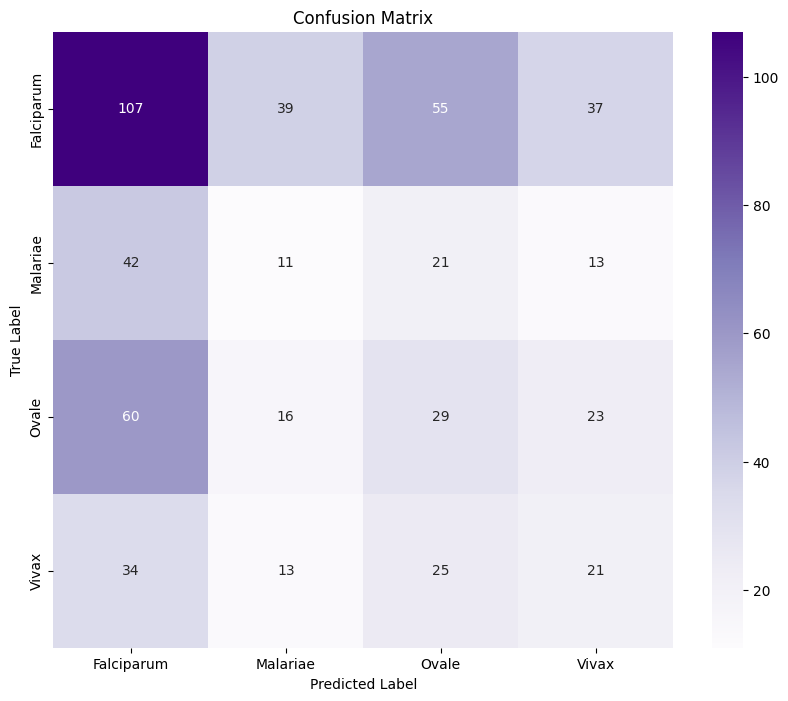

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import InceptionV3  # Use InceptionV3 instead of VGG19
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

dataset_dir = '/content/drive/MyDrive/Malaria/infected'

if not os.path.exists(dataset_dir):
    print("Dataset directory does not exist.")
else:
    print("Dataset directory exists.")

num_stage_classes = len(os.listdir(dataset_dir))

base_model_stage = InceptionV3(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

x_stage = base_model_stage.output
x_stage = GlobalAveragePooling2D()(x_stage)
x_stage = Dense(128, activation='relu')(x_stage)
predictions_stage = Dense(num_stage_classes, activation='softmax')(x_stage)

model_stage = Model(inputs=base_model_stage.input, outputs=predictions_stage)

for layer in base_model_stage.layers:
    layer.trainable = False

model_stage.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


train_datagen_stage = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    zoom_range=0.2,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    brightness_range=[0.8, 1.2],
    horizontal_flip=True,
    validation_split=0.2
)

train_generator_stage = train_datagen_stage.flow_from_directory(
    dataset_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

validation_generator_stage = train_datagen_stage.flow_from_directory(
    dataset_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

early_stopping_stage = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
model_checkpoint_stage = ModelCheckpoint('best_model_inceptionv3_stage.keras', save_best_only=True, monitor='val_loss')
reduce_lr_stage = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=1e-6)

history_stage = model_stage.fit(
    train_generator_stage,
    validation_data=validation_generator_stage,
    epochs=10,
    callbacks=[early_stopping_stage, model_checkpoint_stage, reduce_lr_stage]
)


loss_stage, accuracy_stage = model_stage.evaluate(validation_generator_stage)
print(f"Stage Validation Loss: {loss_stage}, Stage Validation Accuracy: {accuracy_stage}")

true_labels = validation_generator_stage.classes
class_indices = validation_generator_stage.class_indices
predictions = model_stage.predict(validation_generator_stage)
predicted_classes = np.argmax(predictions, axis=1)

cm = confusion_matrix(true_labels, predicted_classes)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples',
            xticklabels=list(class_indices.keys()),
            yticklabels=list(class_indices.keys()))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 312ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 337ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 320ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 312ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 288ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 359ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 397ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 511ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 564ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 284ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 434ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 484ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 385ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 309ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 272ms/step


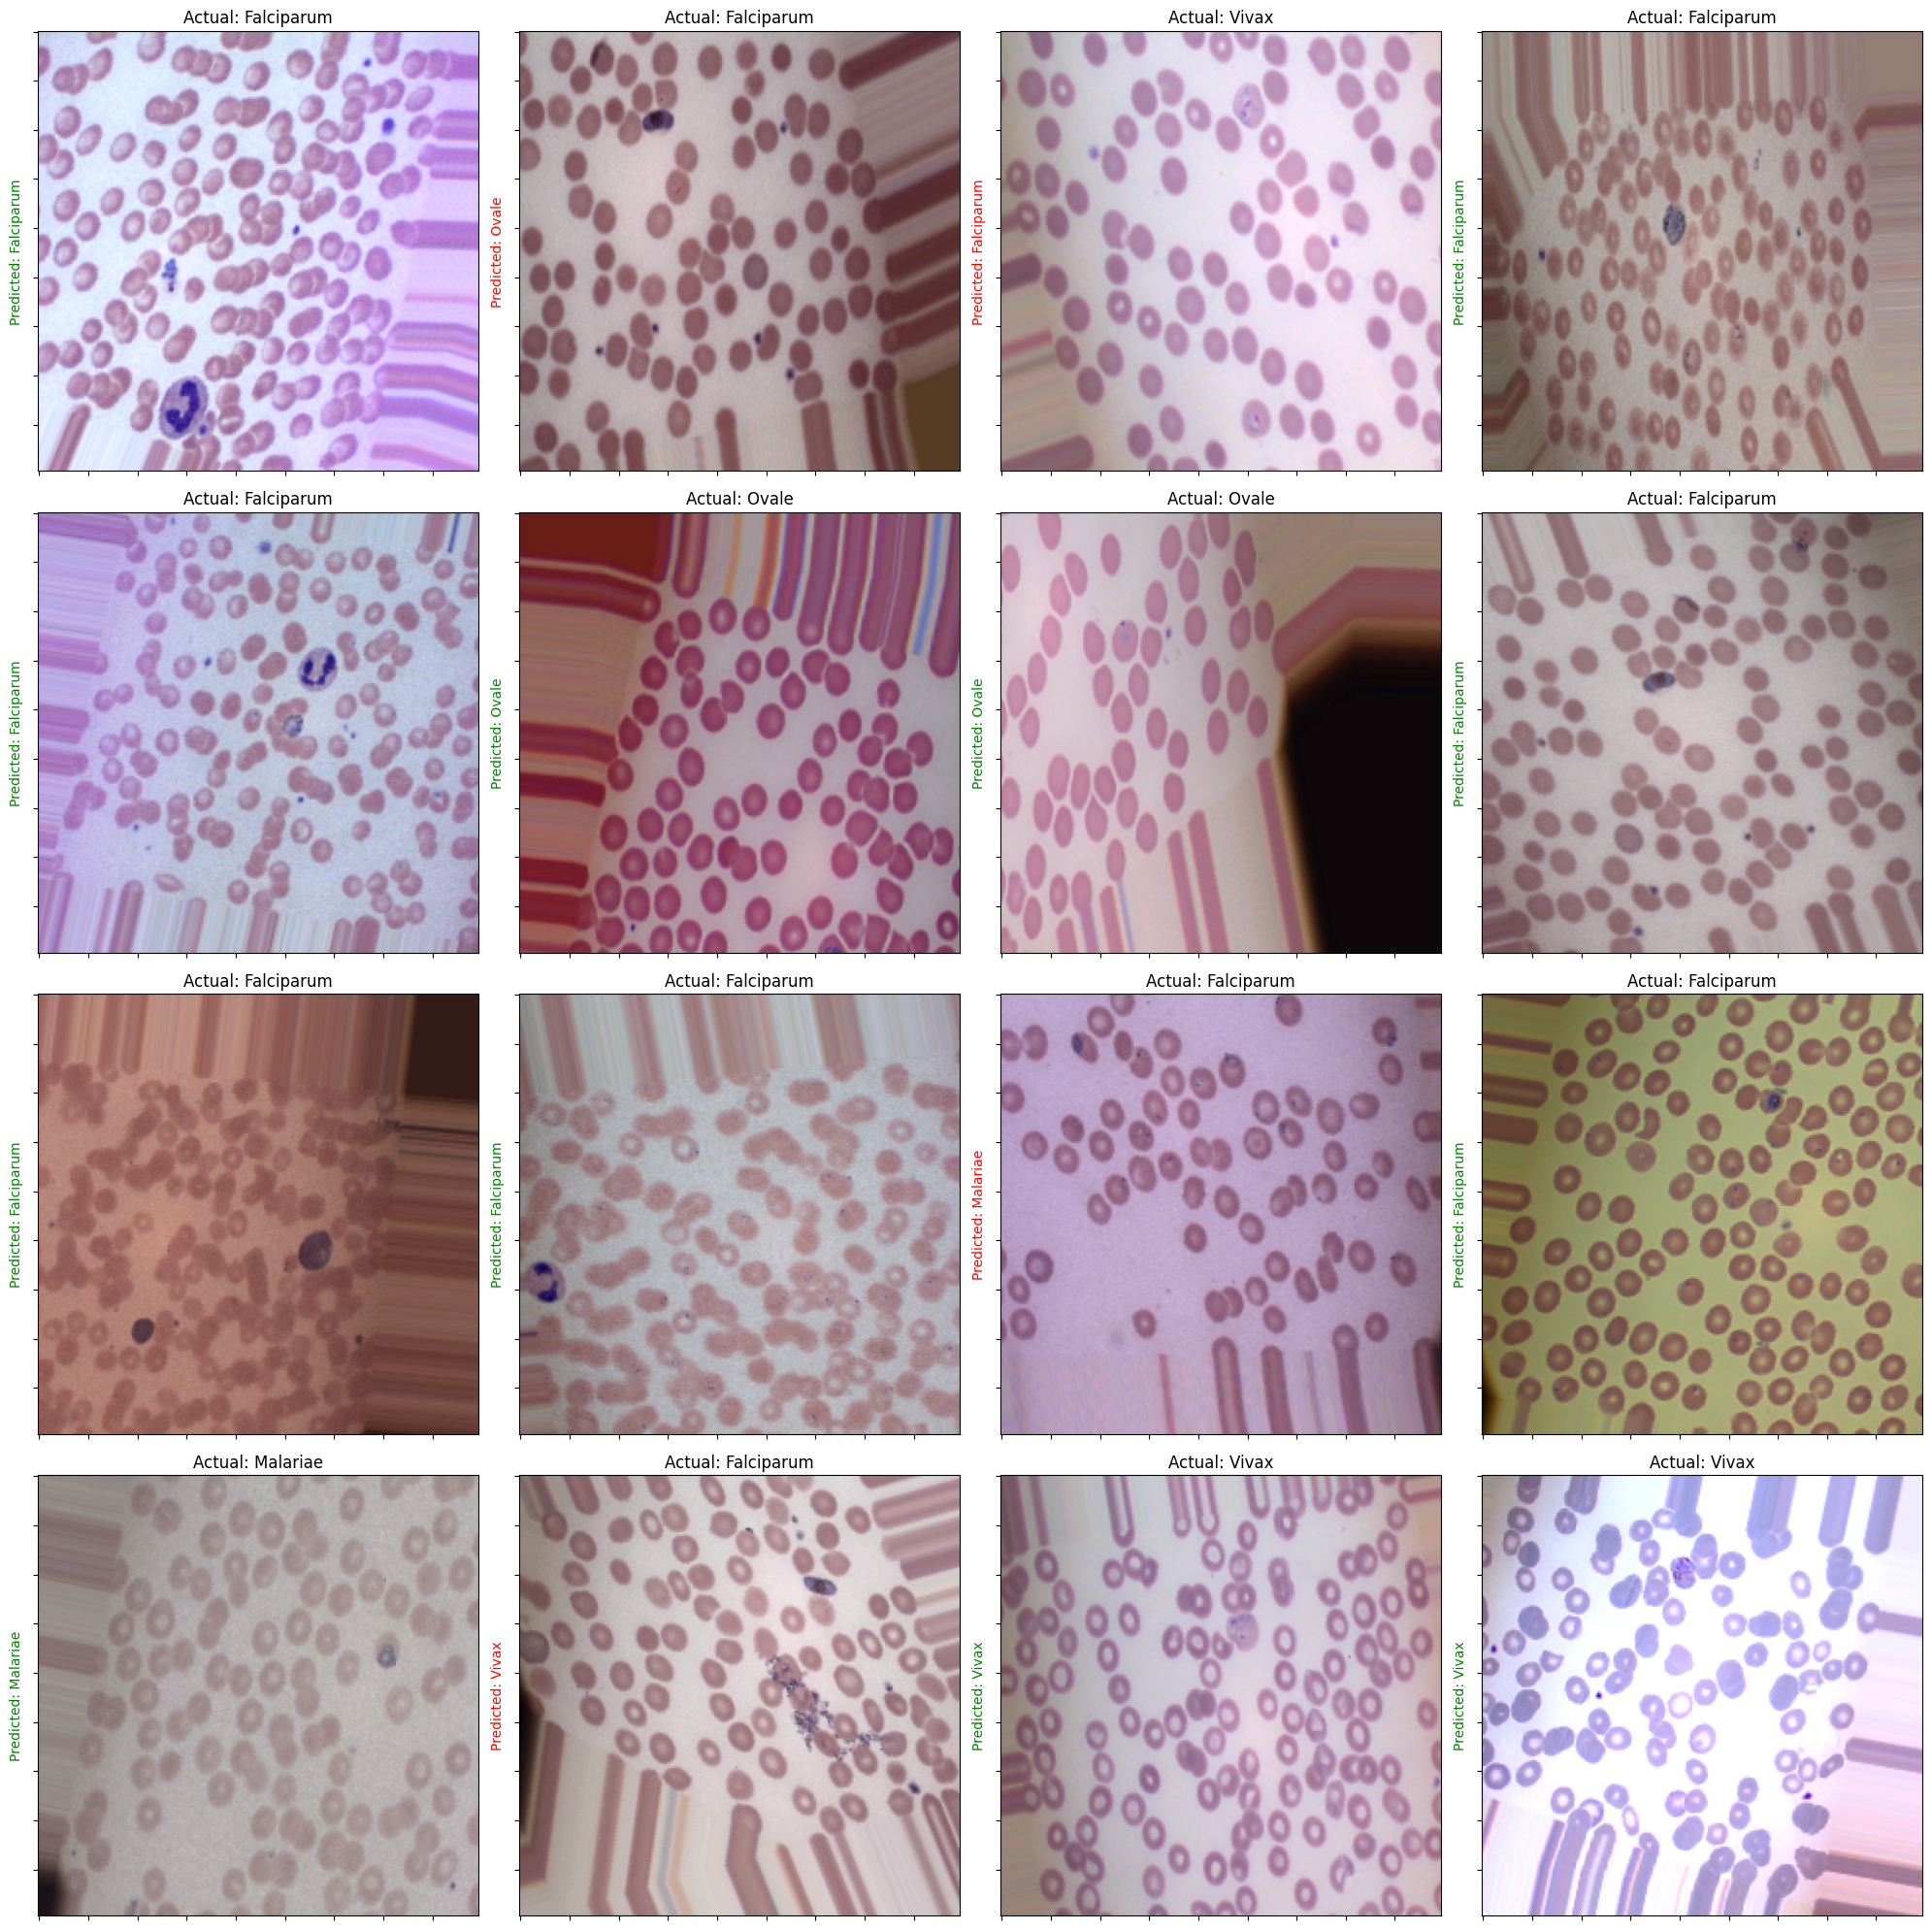

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(20, 20))
class_names_main = train_generator_stage.class_indices
class_names_main = {v: k for k, v in class_names_main.items()}

images_main, labels_main = next(validation_generator_stage)

for i in range(16):
    ax = plt.subplot(4, 4, i + 1)
    plt.imshow(images_main[i])
    predictions_main = model_stage.predict(tf.expand_dims(images_main[i], axis=0))

    score_main = tf.nn.softmax(predictions_main[0])
    predicted_class_main = class_names_main[np.argmax(score_main)]
    actual_class_main = class_names_main[np.argmax(labels_main[i])]

    plt.title(f"Actual: {actual_class_main}")

    if actual_class_main == predicted_class_main:
        plt.ylabel(f"Predicted: {predicted_class_main}", fontdict={'color': 'green'})
    else:
        plt.ylabel(f"Predicted: {predicted_class_main}", fontdict={'color': 'red'})

    plt.gca().axes.yaxis.set_ticklabels([])
    plt.gca().axes.xaxis.set_ticklabels([])

plt.tight_layout()
plt.show()



In [ ]:
import pandas as pd
hist=pd.DataFrame(history_stage.history)
hist

accuracy      loss  val_accuracy  val_loss  learning_rate
0  0.668491  0.855327      0.794872  0.506063         0.0010
1  0.818969  0.475086      0.855311  0.397489         0.0010
2  0.845417  0.396720      0.869963  0.346975         0.0010
3  0.857273  0.383772      0.851648  0.368272         0.0010
4  0.871409  0.341463      0.851648  0.367455         0.0010
5  0.865481  0.338096      0.833333  0.429219         0.0010
6  0.892385  0.282265      0.906593  0.293022         0.0002
7  0.902873  0.260386      0.901099  0.293813         0.0002
8  0.906065  0.250113      0.904762  0.258439         0.0002
9  0.885089  0.281584      0.910256  0.278175         0.0002

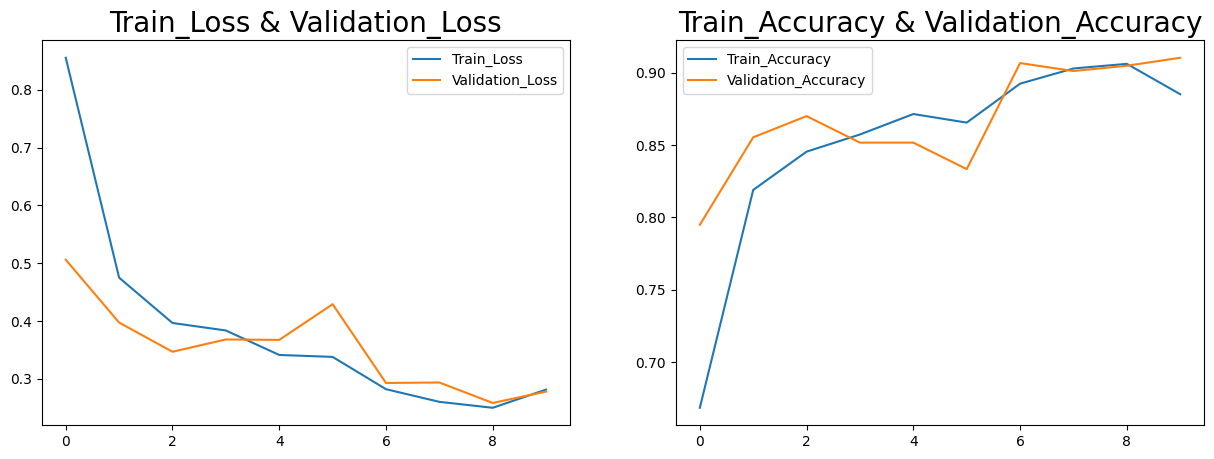

In [ ]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(hist['loss'],label='Train_Loss')
plt.plot(hist['val_loss'],label='Validation_Loss')
plt.title('Train_Loss & Validation_Loss',fontsize=20)
plt.legend()
plt.subplot(1,2,2)
plt.plot(hist['accuracy'],label='Train_Accuracy')
plt.plot(hist['val_accuracy'],label='Validation_Accuracy')
plt.title('Train_Accuracy & Validation_Accuracy',fontsize=20)
plt.legend()